### Случайный лес

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Решаем задачу оценки качества вина по 10-бальной шкале в зависимости от результатов замеров некоторых показателей (остаточный сахар, кислотность, крепость и др)  
[Данные можно найти тут](https://archive.ics.uci.edu/dataset/186/wine+quality)

In [25]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
features = df.drop(['quality'], axis=1)
target = df['quality']

In [28]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Выберем лучшее дерево

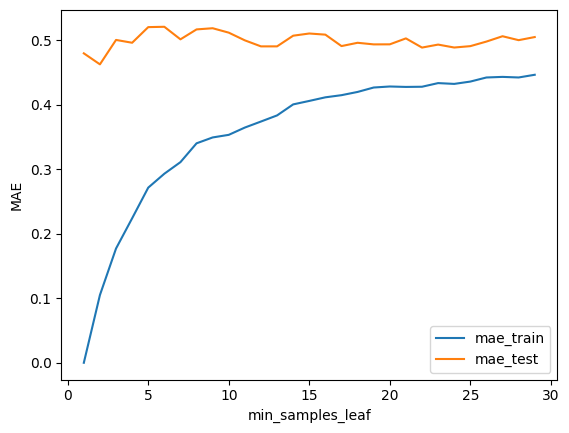

In [29]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeRegressor(min_samples_leaf=param, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [30]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
1,2,0.105088,0.462917


Увеличим число деревьев

In [31]:
model = RandomForestRegressor(n_estimators=5, min_samples_leaf=2, random_state=7)

model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

Ошибка на обучающей выборке: 0.23516025259144524
Ошибка на валидационной выборке: 0.4569750000000001


Попробуем обучить много деревьев

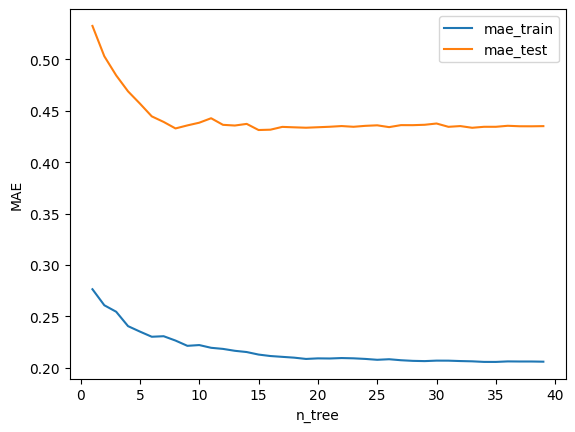

In [32]:
res = []
for n_tree in range(1, 40):
    model = RandomForestRegressor(n_estimators=n_tree, min_samples_leaf=2, random_state=7)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([n_tree, mean_absolute_error(pred_train, target_train), mean_absolute_error(pred_test, target_test)])

res_pd = pd.DataFrame(res, columns=['n_tree', 'mae_train', 'mae_test'])

res_pd.set_index('n_tree')['mae_train'].plot(label='mae_train')
res_pd.set_index('n_tree')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [33]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,n_tree,mae_train,mae_test
14,15,0.212802,0.431253


### Градиентный бустинг

In [34]:
from xgboost import XGBRegressor

In [35]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.15, random_state=42)

Что будет, если захотеть сэкономить на времени обучения и пойти к решению очень большими шагами.

[0]	validation_0-rmse:2.07801	validation_1-rmse:2.23228
[1]	validation_0-rmse:7.83099	validation_1-rmse:7.76857
[2]	validation_0-rmse:30.84671	validation_1-rmse:31.19565
[3]	validation_0-rmse:121.88996	validation_1-rmse:122.64499
[4]	validation_0-rmse:481.81424	validation_1-rmse:485.41386
[5]	validation_0-rmse:1904.86310	validation_1-rmse:1918.46525
[6]	validation_0-rmse:7532.04890	validation_1-rmse:7586.38716
[7]	validation_0-rmse:29786.89501	validation_1-rmse:30000.84972
[8]	validation_0-rmse:117814.29207	validation_1-rmse:118659.60802
[9]	validation_0-rmse:466046.52822	validation_1-rmse:469382.63419
Ошибка MAE на обучающей выборке: 416644.27155442035
Ошибка MAE на валидационной выборке: 407090.071796875


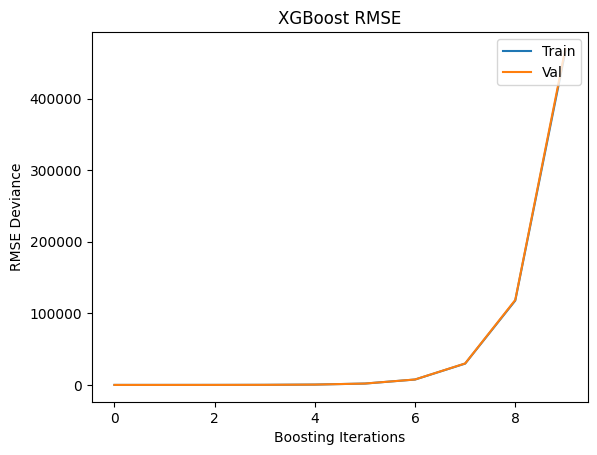

In [36]:
model = XGBRegressor(n_estimators=10, max_depth=3, learning_rate=5)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Что будет, если обучать сложные модели на каждом шаге.

[0]	validation_0-rmse:0.38160	validation_1-rmse:0.75236
[1]	validation_0-rmse:0.23768	validation_1-rmse:0.75684
[2]	validation_0-rmse:0.13823	validation_1-rmse:0.76254
[3]	validation_0-rmse:0.09229	validation_1-rmse:0.77160
[4]	validation_0-rmse:0.06918	validation_1-rmse:0.77286
[5]	validation_0-rmse:0.04962	validation_1-rmse:0.77211
[6]	validation_0-rmse:0.04154	validation_1-rmse:0.77093
[7]	validation_0-rmse:0.03668	validation_1-rmse:0.77174
[8]	validation_0-rmse:0.02988	validation_1-rmse:0.77520
[9]	validation_0-rmse:0.02542	validation_1-rmse:0.77389
Ошибка MAE на обучающей выборке: 0.08704044522594868
Ошибка MAE на валидационной выборке: 0.4507153606414795


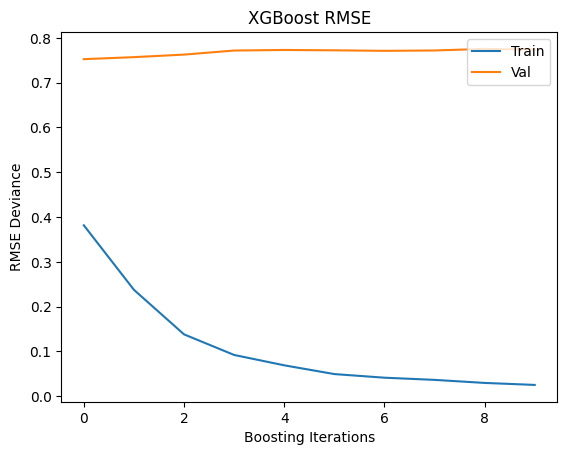

In [37]:
model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.8)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка MAE на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка MAE на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Чтобы избежать переобучения, попробуем взять поменьше шаг, и обучать несложные модели

[0]	validation_0-rmse:0.78335	validation_1-rmse:0.79031
[1]	validation_0-rmse:0.75592	validation_1-rmse:0.77437
[2]	validation_0-rmse:0.73190	validation_1-rmse:0.76088
[3]	validation_0-rmse:0.71066	validation_1-rmse:0.74879
[4]	validation_0-rmse:0.69210	validation_1-rmse:0.73992
[5]	validation_0-rmse:0.67554	validation_1-rmse:0.73212
[6]	validation_0-rmse:0.66029	validation_1-rmse:0.72746
[7]	validation_0-rmse:0.64616	validation_1-rmse:0.72082
[8]	validation_0-rmse:0.63325	validation_1-rmse:0.71547
[9]	validation_0-rmse:0.62176	validation_1-rmse:0.71350
[10]	validation_0-rmse:0.61114	validation_1-rmse:0.71034
[11]	validation_0-rmse:0.60247	validation_1-rmse:0.70897
[12]	validation_0-rmse:0.59378	validation_1-rmse:0.70937
[13]	validation_0-rmse:0.58567	validation_1-rmse:0.70832
[14]	validation_0-rmse:0.57946	validation_1-rmse:0.70839
[15]	validation_0-rmse:0.57203	validation_1-rmse:0.70947
[16]	validation_0-rmse:0.56718	validation_1-rmse:0.71007
[17]	validation_0-rmse:0.56097	validation

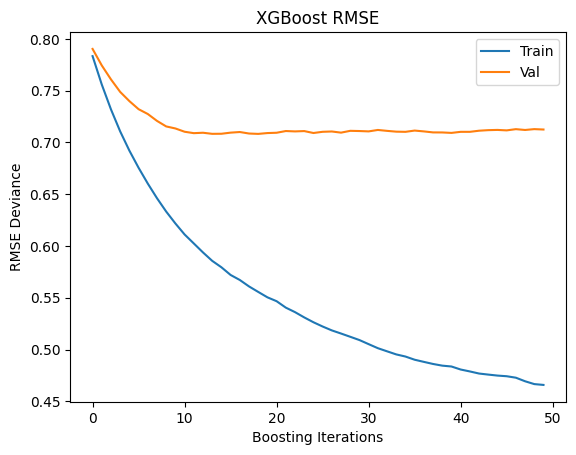

In [38]:
model = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.09)

model.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train, target_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

### Какая интуиция стоит за регуляризацией

In [40]:
df = pd.read_csv('winequality-red.csv', sep=';')
features = df.drop(['quality'], axis=1)
target = df['quality']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42
)

Обучим линейную модель без регуляризации на одной фиче

In [41]:
# выберем фичу с наибольшей корреляцией с целевым признаком, чтобы получить неплохую модель
df.corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [42]:
# обучаем линейную регрессию
linear_one_feature = LinearRegression()
linear_one_feature.fit(features_train[['alcohol']], target_train)
linear_one_feature_predict = linear_one_feature.predict(features_test[['alcohol']])
print(mean_absolute_error(target_test, linear_one_feature_predict))

0.5705687240628572


In [43]:
# посмотрим коэффициенты для линии
print(f'k = {"{:.2f}".format(linear_one_feature.coef_[0])}, b = {"{:.2f}".format(linear_one_feature.intercept_)}')

k = 0.37, b = 1.73


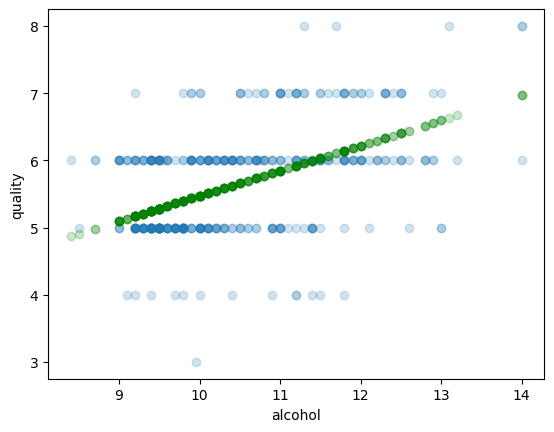

In [44]:
# визуализируем прогноз
plt.scatter(features_test['alcohol'], target_test, alpha=0.2)
plt.scatter(features_test['alcohol'], linear_one_feature_predict, alpha=0.2, color='green')
plt.xlabel('alcohol')
plt.ylabel('quality')

plt.show;

Обучим линейную модель с регуляризацией на одной фиче

In [45]:
# обучаем линейную регрессию с регуляризацией
lasso_one_feature = Lasso(alpha=0.2)
lasso_one_feature.fit(features_train[['alcohol']], target_train)
lasso_one_feature_predict = lasso_one_feature.predict(features_test[['alcohol']])
print(mean_absolute_error(target_test, lasso_one_feature_predict))

0.5933445526687305


In [46]:
# посмотрим коэффициенты для линии
print(f'k = {"{:.2f}".format(lasso_one_feature.coef_[0])}, b = {"{:.2f}".format(lasso_one_feature.intercept_)}')

k = 0.20, b = 3.59


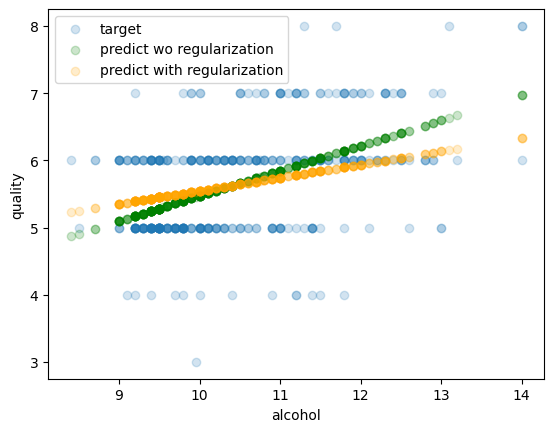

In [47]:
# визуализируем прогнозы
plt.scatter(features_test['alcohol'], target_test, alpha=0.2, label='target')
plt.scatter(features_test['alcohol'], linear_one_feature_predict, alpha=0.2, color='green', label='predict wo regularization')
plt.scatter(features_test['alcohol'], lasso_one_feature_predict, alpha=0.2, color='orange', label='predict with regularization')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend();

plt.show;

А что будет если переборщить с регуляризацией?

In [48]:
# обучаем линейную регрессию с максимальной регуляризацией
lasso_one_feature_max = Lasso(alpha=1)
lasso_one_feature_max.fit(features_train[['alcohol']], target_train)
lasso_one_feature_max_predict = lasso_one_feature_max.predict(features_test[['alcohol']])
print(mean_absolute_error(target_test, lasso_one_feature_max_predict))

0.6685091743119267


In [49]:
# посмотрим коэффициенты для линии
print(f'k = {"{:.2f}".format(lasso_one_feature_max.coef_[0])}, b = {"{:.2f}".format(lasso_one_feature_max.intercept_)}')

k = 0.00, b = 5.63


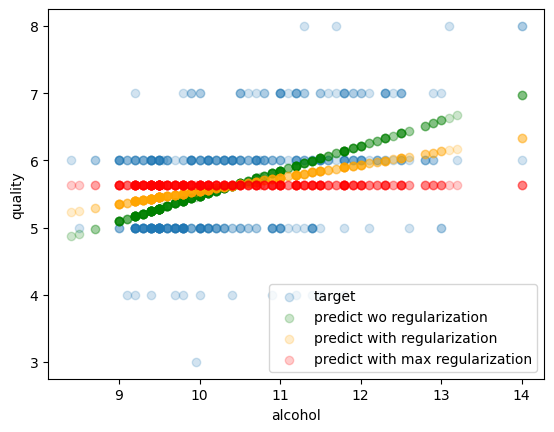

In [50]:
# визуализируем прогнозы
plt.scatter(features_test['alcohol'], target_test, alpha=0.2, label='target')
plt.scatter(features_test['alcohol'], linear_one_feature_predict, alpha=0.2, color='green', label='predict wo regularization')
plt.scatter(features_test['alcohol'], lasso_one_feature_predict, alpha=0.2, color='orange', label='predict with regularization')
plt.scatter(features_test['alcohol'], lasso_one_feature_max_predict, alpha=0.2, color='red', label='predict with max regularization')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend();

plt.show;

In [51]:
# убедимся, что свободный член - это просто среднее целевого признака на обучающей выборке
"{:.2f}".format(target_train.mean())

'5.63'

<div>
<img src="attachment:image-2.png" width="500"/>
</div>

### Регуляризация линейных моделей

Обучим простую линейную регрессию

In [52]:
linear = LinearRegression()
linear.fit(features_train, target_train)
linear_predict = linear.predict(features_test)
print(mean_absolute_error(target_test, linear_predict))

0.49987991229254464


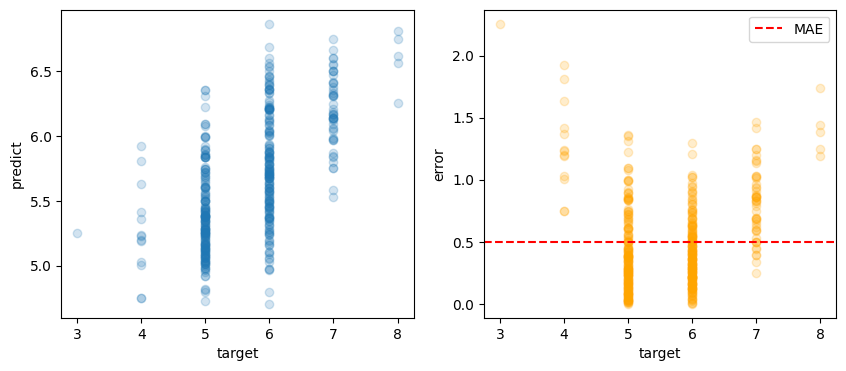

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(target_test, linear_predict, alpha=0.2)
axes[0].set_xlabel('target')
axes[0].set_ylabel('predict')

axes[1].scatter(target_test, abs(linear_predict-target_test), alpha=0.2, color='orange')
axes[1].set_xlabel('target')
axes[1].set_ylabel('error')
axes[1].axhline(y=mean_absolute_error(target_test, linear_predict), color='r', linestyle='--', label='MAE')
axes[1].legend()

fig.show;

In [54]:
pd.DataFrame(zip(features_test.columns, linear.coef_), columns=['feature', 'coef'])

,feature,coef
0,fixed acidity,0.021860
1,volatile acidity,-1.008695
2,citric acid,-0.133904
3,residual sugar,0.008859
4,chlorides,-1.755578
5,free sulfur dioxide,0.005009
6,total sulfur dioxide,-0.003654
7,density,-16.223648
8,pH,-0.343940
9,sulphates,0.819819


In [55]:
sum(abs(linear.coef_))

20.611194980829193

In [56]:
sum(linear.coef_**2)

268.19711820462317

In [57]:
linear_predict.var()

0.21955571825659398

Обучим линейную регрессию с L1 регуляризацией

In [58]:
lasso = Lasso(alpha=0.01)
lasso.fit(features_train, target_train)
lasso_predict = lasso.predict(features_test)
print(mean_absolute_error(target_test, lasso_predict))

0.5153175869436404


In [59]:
sum(abs(lasso.coef_))

1.4792099929352975

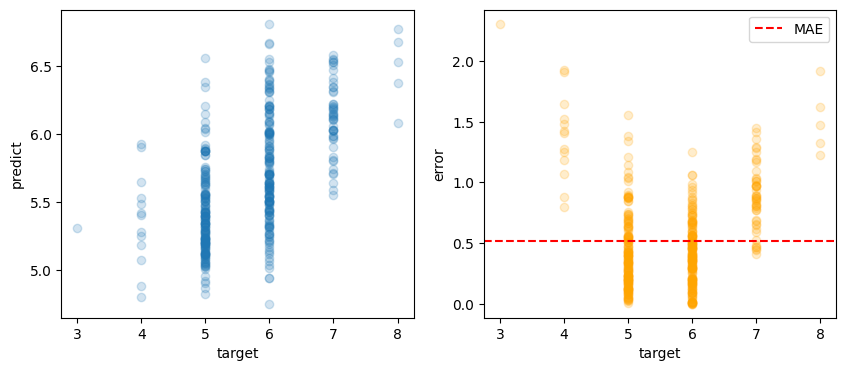

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(target_test, lasso_predict, alpha=0.2)
axes[0].set_xlabel('target')
axes[0].set_ylabel('predict')

axes[1].scatter(target_test, abs(lasso_predict-target_test), alpha=0.2, color='orange')
axes[1].set_xlabel('target')
axes[1].set_ylabel('error')
axes[1].axhline(y=mean_absolute_error(target_test, lasso_predict), color='r', linestyle='--', label='MAE')
axes[1].legend()

fig.show;

In [61]:
pd.DataFrame(zip(features_test.columns, lasso.coef_), columns=['feature', 'coef'])

,feature,coef
0,fixed acidity,0.029238
1,volatile acidity,-0.800458
2,citric acid,0.000000
3,residual sugar,-0.000000
4,chlorides,-0.000000
5,free sulfur dioxide,0.005680
6,total sulfur dioxide,-0.003541
7,density,-0.000000
8,pH,-0.000000
9,sulphates,0.327365


In [62]:
lasso_predict.var()

0.184952496393929

Обучим линейную регрессию с L2-регуляризацией

In [63]:
ridge = Ridge(alpha=0.01)
ridge.fit(features_train, target_train)
ridge_predict = ridge.predict(features_test)
print(mean_absolute_error(target_test, ridge_predict))

0.49973229570833366


In [64]:
sum(ridge.coef_**2)

6.19055484802954

In [65]:
pd.DataFrame(zip(features_test.columns, ridge.coef_), columns=['feature', 'coef'])

,feature,coef
0,fixed acidity,0.007880
1,volatile acidity,-1.019046
2,citric acid,-0.135242
3,residual sugar,0.002370
4,chlorides,-1.767542
5,free sulfur dioxide,0.005149
6,total sulfur dioxide,-0.003696
7,density,-1.051640
8,pH,-0.419327
9,sulphates,0.798498


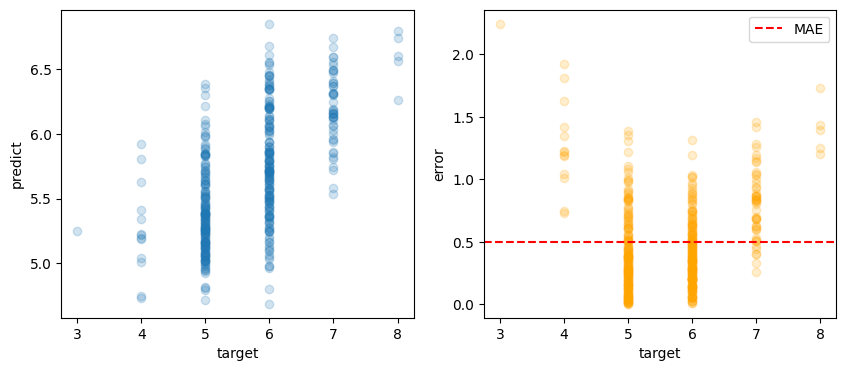

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(target_test, ridge_predict, alpha=0.2)
axes[0].set_xlabel('target')
axes[0].set_ylabel('predict')

axes[1].scatter(target_test, abs(ridge_predict-target_test), alpha=0.2, color='orange')
axes[1].set_xlabel('target')
axes[1].set_ylabel('error')
axes[1].axhline(y=mean_absolute_error(target_test, ridge_predict), color='r', linestyle='--', label='MAE')
axes[1].legend()

fig.show;

In [67]:
ridge_predict.var()

0.21843403075786255

Обучим обе регуляризации сразу

In [68]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(features_train, target_train)
elastic_net_predict = elastic_net.predict(features_test)
print(mean_absolute_error(target_test, elastic_net_predict))

0.5129967149895676


In [69]:
pd.DataFrame(zip(features_test.columns, elastic_net.coef_), columns=['feature', 'coef'])

,feature,coef
0,fixed acidity,0.029505
1,volatile acidity,-0.804794
2,citric acid,0.000000
3,residual sugar,-0.002171
4,chlorides,-0.000000
5,free sulfur dioxide,0.005718
6,total sulfur dioxide,-0.003548
7,density,-0.000000
8,pH,-0.000000
9,sulphates,0.419525


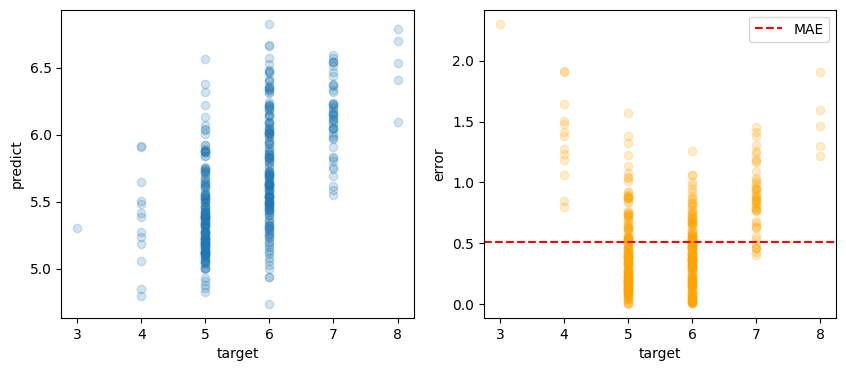

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(target_test, elastic_net_predict, alpha=0.2)
axes[0].set_xlabel('target')
axes[0].set_ylabel('predict')

axes[1].scatter(target_test, abs(elastic_net_predict-target_test), alpha=0.2, color='orange')
axes[1].set_xlabel('target')
axes[1].set_ylabel('error')
axes[1].axhline(y=mean_absolute_error(target_test, elastic_net_predict), color='r', linestyle='--', label='MAE')
axes[1].legend()

fig.show;

In [71]:
elastic_net_predict.var()

0.19042219061399485